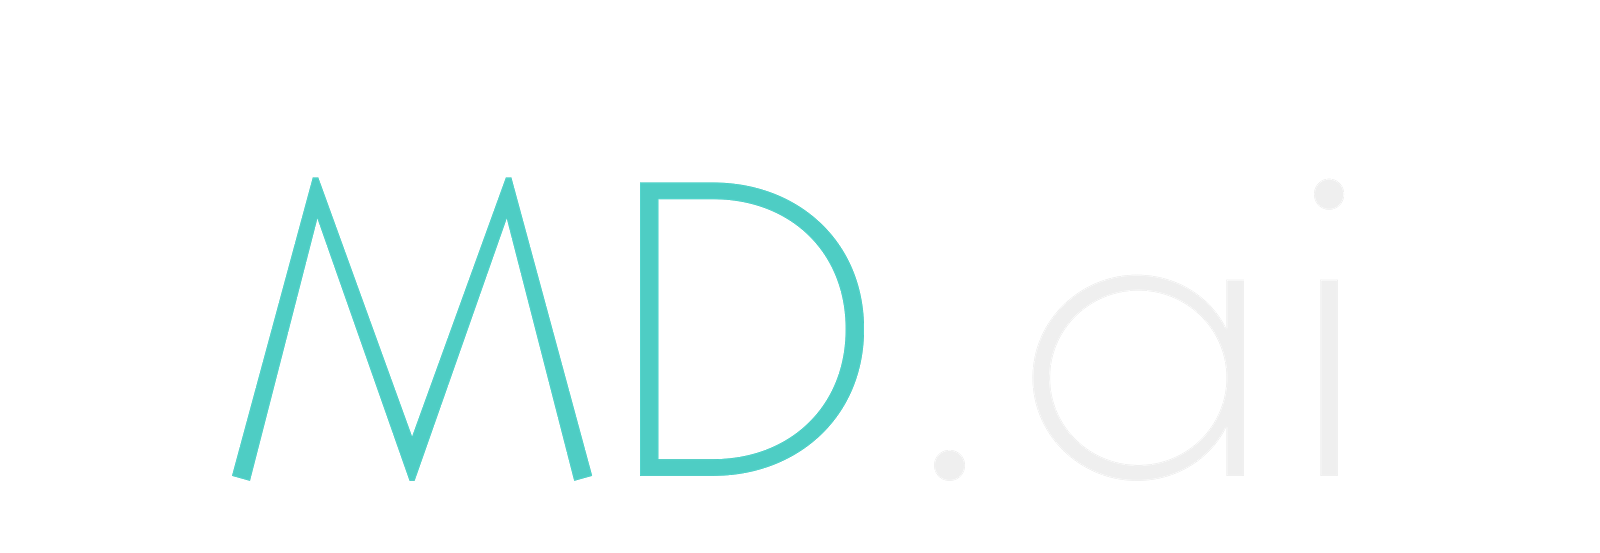

# **Overview**
### A gamification plan is establish by creating leaderboards of annotators to achieve the following purposes. First, in order to give annotators more incentive to perform annotating tasks, a leaderboard allows them to see how much they have worked compared to their fellow annotators and how they should adjust their participation. The badges in the leaderboard will give them an opportunity to share their achievement on social media platforms to show their activities and skills which may benefit their future career path. In addition, the leaderboard provides project managers a better way to recuit qualified annotators based on the experience levels they are looking for and track the effort of their annotators. Last but not least, the leaderboard allows MD.ai to have a deeper understanding of annotator's contributions and provide perks and bonuses to top players while also popularizing its products to drive growth and awareness to the MD.ai brand.

### The following gamification code calculates score according to annotation and engagement data to form three types of leaderboards: 
  1. An overall leaderboard per annotator group
  2. A project leaderboard for each project
  3. An engagement leaderboard to award annotators who have helped with QA and initiated meaningful dicussions

Scoring is based on the following: 
*   Number of labels used for annotation
 *  Each label has a weight specified by the project manager based on the annotation difficulty level 
*  Engagement labels created QA/posting feedback/comments/questions
 * Each engagement label has a weight of 2

The leaderboard is shown in the following formats:
* Overall leaderboard with entry to intermediate level annotators
 *   Columns: 'Username', 'Score', 'Badge', 'Role'
* Overall leaderboard with mid to senior level annotators
 *   Columns: 'Username', 'Score', 'Badge', 'Role'
* Project leaderboards with all annotators who worked in that project
 *   Columns: 'Project ID', 'Username', 'Score', 'Role'
* Engagement leaderboard with all annotators based solely on engagement
 *   Columns: 'Username', 'Score', 'Badge', 'Role'



## Import packages and set up tools

In [ ]:
import json
import pandas as pd
import shlex, subprocess

!pip install --upgrade --quiet mdai

zip_file = 'mdai_cli_0.18.6_linux_amd64.zip'

!wget -q -O mdai_cli_0.18.6_linux_amd64.zip https://s3.amazonaws.com/mdai-packages/cli/mdai_cli_0.18.6_linux_amd64.zip

!unzip -o mdai_cli_0.18.6_linux_amd64.zip
!rm -f mdai_cli_0.18.6_linux_amd64.zip

!mv mdai /usr/local/bin/
!mdai config domain {domain}
!mdai config token {token}

In [ ]:
def run_cli_cmds(cmds):
    error = open('error.txt', "w+", encoding="utf8") # create output file
    output = open('tmp.txt', "w+", encoding="utf8")
    try:
        for c in cmds:
            out = c['out']
            output = open(out, "w+", encoding="utf8") # create output file
            subprocess.run(shlex.split(c['command']), stdout=output, stderr=error, check=True)
    except Exception:
        print("exception")
    output.close()  
    error.close()

In [ ]:
import mdai
import pandas as pd
from pathlib import Path
import json
import numpy as np

## Download users, roles, annotations, labels, and label weights

In [ ]:
def download_users(domain, token, project_id, users):
  user_output = 'users.json'
  assign_output = 'assignments.json'
  cmds = [{'command': f'mdai config domain {domain}', 'out':'output.txt'},
          {'command':f'mdai config token {token}', 'out':'output.txt'},
          {'command':f'mdai project list-users --project-id {project_id} --json > {user_output}','out':user_output},
  ]
        
  run_cli_cmds(cmds)

  with open(user_output) as f:
      content = json.load(f)

  users = users.append(pd.DataFrame(content['data']))
  return users

**ATTENTION:**

Replace the "download_users" call with your domain, token, and project id in the following format: 

download_users(domain, token, project id, users)

In [ ]:
users = pd.DataFrame()
users = download_users('', '', '', users)
users = download_users('', '', '', users)
users = download_users('', '', '', users)
users = download_users('', '', '', users)
users = download_users('', '', '', users)
#users = download_users('domain', 'your user token', 'project id', users)
#please do not share your user tokens

In [ ]:
display(users)

In [ ]:
def download(DOMAIN, ACCESS_TOKEN, project_id, annotations, labels):
  mdai_client = mdai.Client(domain=DOMAIN, access_token=ACCESS_TOKEN)
  p = mdai_client.project(project_id, annotations_only=True)
  paths = [str(p) for p in Path.cwd().glob("**/*.json")]
  latest_modified = np.argmax([Path(p).stat().st_mtime for p in paths])
  JSON = paths[latest_modified]
  results = mdai.common_utils.json_to_dataframe(JSON)
  
  annotations_temp = results['annotations']
  annotations_temp.insert(0, 'projectId', project_id)
  annotations = annotations.append(annotations_temp, ignore_index=True)
  labels_temp = pd.DataFrame()
  labels_temp = results['labels']
  labels_temp.insert(0, 'Project Id', project_id)
  labels = labels.append(labels_temp, ignore_index=True)

  return annotations, labels

## Initialize dataframes

In [ ]:
annotations = pd.DataFrame()
labels = pd.DataFrame()

**Use the following code for reading annotations in JSON format already downloaded to your local machine. Ignore this code segment if downloading using API.**

Please follow these steps:
1. Download annotations in JSON format using MD.ai UI
2. Upload the file into "Files" on the left panel
3. Change the variable "project_id" to your correct Project ID
4. Run the following code segment

NOTE: The code will always use the latest uploaded file

In [ ]:
#Insert the correct Project ID
#project_id = ''

#paths = [str(p) for p in Path.cwd().glob("**/*.json")]
#latest_modified = np.argmax([Path(p).stat().st_mtime for p in paths])

#Insert the file path
#JSON = '/content/XXX.json'
#results = mdai.common_utils.json_to_dataframe(JSON)

#annotations_temp = results['annotations']
#annotations_temp.insert(0, 'projectId', project_id)
#annotations = annotations.append(annotations_temp, ignore_index=True)
#labels_temp = pd.DataFrame()
#labels_temp = results['labels']
#labels_temp.insert(0, 'Project Id', project_id)
#labels = labels.append(labels_temp, ignore_index=True)

**ATTENTION:**

Replace the "download" call with your domain, token, and project id in the following format: 

download(domain, token, project id, annotations, labels)

In [ ]:
annotations, labels = download('', '', '', annotations, labels)
annotations, labels = download('', '', '', annotations, labels)
annotations, labels = download('', '', '', annotations, labels)
annotations, labels = download('', '', '', annotations, labels)
annotations, labels = download('', '', '', annotations, labels)

In [ ]:
display(annotations.tail())
display(labels.head())

**ATTENTION:**

Authorize your Google Spreadsheet to be used in this notebook.

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

**ATTENTION:**

Make sure weights and roles spreadsheets are updated before running the following!

In [ ]:
# get weight speadsheet
wb = gc.open_by_url('')
weights_sheet = wb.worksheet('weight_book')
weights_data = weights_sheet.get_all_values()
weights = pd.DataFrame(weights_data)
weight_columnNames = weights.iloc[0] 
weights = weights[1:] 
weights.columns = weight_columnNames
weights["Points"] = weights["Points"].astype(float)
display(weights)

# get roles spreadsheet
wb = gc.open_by_url('')
roles_sheet = wb.worksheet('Sheet1')
roles_data = roles_sheet.get_all_values()
roles = pd.DataFrame(roles_data)
roles_columnNames = roles.iloc[0] 
roles = roles[1:] 
roles.columns = roles_columnNames
display(roles)

## Code for creating a weight_book

**ATTENTION:**

If your need help in creating a CSV to input weights, please uncomment and run the following code segment.

In [ ]:
 labels_for_csv = labels[['Project Id', 'labelId', 'labelName', 'groupName']].copy()
 labels_for_csv['Points'] = 0
 labels_for_csv.to_csv('weight_book.csv',index=False)

**-------------------------------------------**

##Create fake users and annotations for testing (omit this part)

In [ ]:
# Code for creating fake usernames and roles
# from random import choice
# from string import ascii_lowercase, digits

# chars = ascii_lowercase + digits
# users = {'createdById': [''.join(choice(chars) for _ in range(8)) for _ in range(100)], 'experience_level': [np.random.choice(['Students','Technologists', 'Residents', 'Attendings']) for i in range(100)]}
# users_tuple = tuple(zip(users['createdById'], users['experience_level']))
# print(users_tuple)

In [ ]:
# temp = pd.DataFrame({'projectId' : [np.random.choice(['1', '2', '3', '4', '5', '6', '7', '8']) for i in range(5000)],
#                      'createdById' : [np.random.choice(roles['createdById']) for i in range(5000)],
#                      'StudyInstanceUID' : [np.random.choice(['1', '2', '3', '4']) for i in range(5000)]})
# def find_label(x):
#   global roles
#   global weights
#   id = x['createdById']
#   experience_level = roles[roles['createdById'] == id]['experience_level'].iloc[0]
#   if (experience_level in ['Student', 'Technologist', 'Other medical professional']):
#     label = np.random.choice(weights[weights['Points'] < 3]['labelId'])
#   elif (experience_level in ['Resident', 'Fellow']):
#     label = np.random.choice(weights[(weights['Points'] >= 3) & (weights['Points'] <= 5)]['labelId'])
#   else:
#     label = np.random.choice(weights[(weights['Points'] >= 3) & (weights['Points'] <= 8)]['labelId'])
#   return label
# temp['labelId'] = temp.apply(find_label, axis=1)
# annotations = annotations.append(temp, ignore_index=True)
# display(annotations)

In [ ]:
# annotations = annotations.append(pd.DataFrame(
#     {'projectId' : [np.random.choice(['1', '2', '3', '4', '5', '6', '7', '8']) for i in range(500)],
#     'createdById' : [np.random.choice(roles['createdById']) for i in range(500)],
#     'StudyInstanceUID' : [np.random.choice(['1', '2', '3', '4']) for i in range(500)],
#     'labelId' : [np.random.choice(['L_eg6Kz2', 'L_GQo0KZ', 'L_JQV1V2', 'L_pgrAbZ', 'L_v2zbk2', 'L_83GDR8', 'L_BOPzDl', 'L_dpOqWl', 'L_lVp698', 'L_Bkaz7d', 'L_dDND3B', 'L_lbZnXl', 'L_dXQPV8', 'L_BaxR38', 'L_8W176l', 'L_lPYxYd', 'L_Bnx2Ed']) for i in range(500)]}), ignore_index=True)

## Establish functions for integrating information

In [ ]:
def find_name(x):
  global users
  temp = x['createdById']
  if temp in users['id'].values:
    name = users[users['id'] == temp]['email'].iloc[0]
  else:
    name = np.NAN
  return name
# find_name(annotations.iloc[1])
annotations['email'] = annotations.apply(find_name, axis=1)
annotations.tail()

In [ ]:
def score(x):
  global weights
  temp = x['labelId']
  return weights[weights['labelId'] == temp]['Points'].iloc[0]
annotations['score'] = annotations.apply(score, axis=1)
annotations.tail()

In [ ]:
def find_role(x):
  global roles
  temp = x['email']
  if temp in roles['Email'].values:
    s = roles[roles['Email'] == temp]['Group'].iloc[0]
  else:
    s = 0
  return s

In [ ]:
def find_username(x):
  global roles
  temp = x['email']
  if temp in roles['Email'].values:
    s = roles[roles['Email'] == temp]['Temp Username'].iloc[0]
  else:
    s = 0
  return s

In [ ]:
def find_badge(x):
  if x['Rank'] <= 3:
    badge = "🥇"
  elif x['Rank'] <= 6:
    badge = "🥈"
  else:
    badge = "🥉"
  return badge

In [ ]:
def find_badge_engage(x):
  if x['score'] > 6:
    badge = "🗣"
  else:
    badge = "🗣"
  return badge

##Calculate score per project per user for everyone

In [ ]:
pd.options.display.max_rows = 999
project_scores = pd.DataFrame(annotations.groupby(['projectId', 'email','StudyInstanceUID', 'labelId'])['score'].first().astype(float))
project_scores = pd.DataFrame(project_scores.groupby(['projectId', 'email'])['score'].sum())
project_scores.reset_index(inplace=True)
project_scores.sort_values(['projectId','score'], ascending=[True,False], inplace = True)
project_scores.reset_index(inplace=True, drop=True)
project_scores['Username'] = project_scores.apply(find_username, axis=1)
project_scores['Role'] = project_scores.apply(find_role, axis=1)
project_scores = project_scores[project_scores['Role'] != 0]
project_scores.columns = ['Project ID', 'Email', 'Score', 'Username', 'Role']
project_scores = project_scores[['Project ID', 'Username', 'Score', 'Role']]
display(project_scores)

##Form leaderboard based on annotation scores

In [ ]:
leaderboard = pd.DataFrame(annotations.groupby(['email','StudyInstanceUID', 'labelId'])['score'].first().astype(float))
leaderboard = pd.DataFrame(leaderboard.groupby('email')['score'].sum().sort_values(ascending=False))
leaderboard.reset_index(inplace=True)

pd.set_option('display.max_rows', 200)

leaderboard['Username'] = leaderboard.apply(find_username, axis=1)
leaderboard['Role'] = leaderboard.apply(find_role, axis=1)
leaderboard = leaderboard[leaderboard['Role'] != 0]
leaderboard['Rank'] = leaderboard['score'].rank(ascending = 0)
leaderboard['Badge'] = leaderboard.apply(find_badge, axis=1)
leaderboard.columns = ['Email', 'Score', 'Username', 'Role', 'Rank', 'Badge']
leaderboard = leaderboard[['Username', 'Score', 'Badge', 'Role']]

group1 = leaderboard[(leaderboard['Role'] == 'Student') | (leaderboard['Role'] == 'Technologist') | (leaderboard['Role'] == 'Other Medical Professional')]
group2 = leaderboard[(leaderboard['Role'] == 'Resident') | (leaderboard['Role'] == 'Attending') | (leaderboard['Role'] == 'Fellow')]
display(leaderboard)
print('\n')
display(group1)
print('\n')
display(group2)

## Form leaderboard based on engagement scores

In [ ]:
# engagement_leaderboard = pd.DataFrame(engagement_annotations.groupby(['email','StudyInstanceUID', 'labelId'])['score'].first())
# engagement_leaderboard = pd.DataFrame(engagement_leaderboard.groupby('email')['score'].sum().sort_values(ascending=False))
# engagement_leaderboard.reset_index(inplace=True)

# engagement_leaderboard['Username'] = engagement_leaderboard.apply(find_username, axis=1)
# engagement_leaderboard['Role'] = engagement_leaderboard.apply(find_role, axis=1)
# engagement_leaderboard = engagement_leaderboard[engagement_leaderboard['Role'] != 0]
# engagement_leaderboard['Rank'] = engagement_leaderboard['score'].rank(ascending = 0)
# engagement_leaderboard['Badge'] = engagement_leaderboard.apply(find_badge_engage, axis=1)
# engagement_leaderboard.columns = ['Email', 'Score', 'Username', 'Role', 'Rank', 'Badge']
# engagement_leaderboard = engagement_leaderboard[['Username', 'Score', 'Badge', 'Role']]
# engagement_leaderboard.head(50)

## Save leaderboards as CSV

In [ ]:
annotations.to_csv('annotations.csv', index=False)
project_scores.to_csv('project_scores.csv', index=False)
group1.to_csv('group1.csv', index=False)
group2.to_csv('group2.csv', index=False)
# engagement_leaderboard.to_csv('engagement_leaderboard.csv', index=False)

You can download the CSV files in "Files" on the left panel.